In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
filepath='/content/data.csv'
df=pd.read_csv(filepath)
df = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-02,183.820007,187.300003,183.419998,187.179993,182.199005,17731300
2018-07-03,187.789993,187.949997,183.539993,183.919998,179.025772,13954800
2018-07-05,185.259995,186.410004,184.279999,185.399994,180.466370,16604200
2018-07-06,185.419998,188.429993,185.199997,187.970001,182.967972,17485200
2018-07-09,189.500000,190.679993,189.300003,190.580002,185.508545,19756600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2018-07-02 to 2020-06-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       503 non-null    float64
 1   High       503 non-null    float64
 2   Low        503 non-null    float64
 3   Close      503 non-null    float64
 4   Adj Close  503 non-null    float64
 5   Volume     503 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


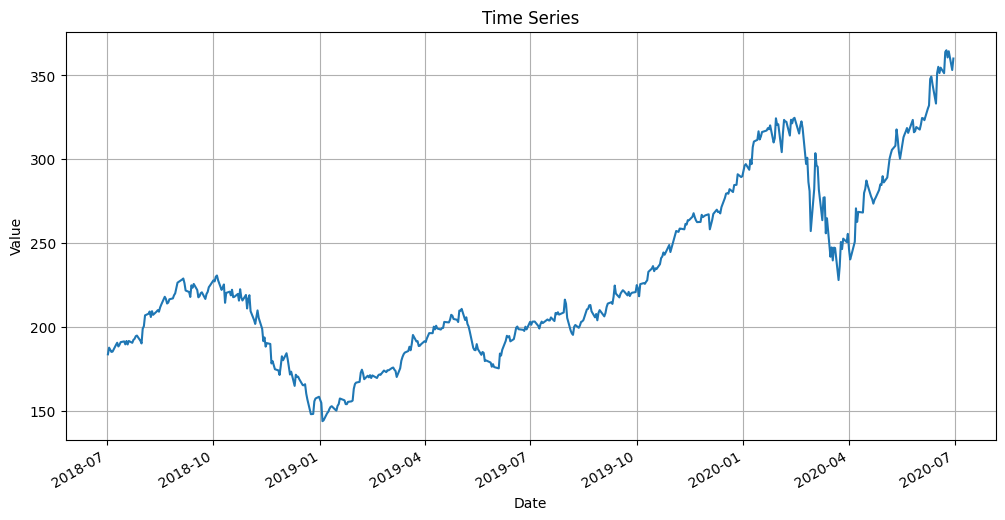

In [ ]:
# Select a single time series column (assuming it has a numeric column)
time_series = df.iloc[:, 0]

# Plot the time series
plt.figure(figsize=(12, 6))
time_series.plot(title='Time Series', ylabel='Value', xlabel='Date')
plt.grid()
plt.show()

Time Series Decomposition : Decompose the series (Additive/Multiplicative) into Trend, Seasonality, and Residuals; plot and analyze each component.

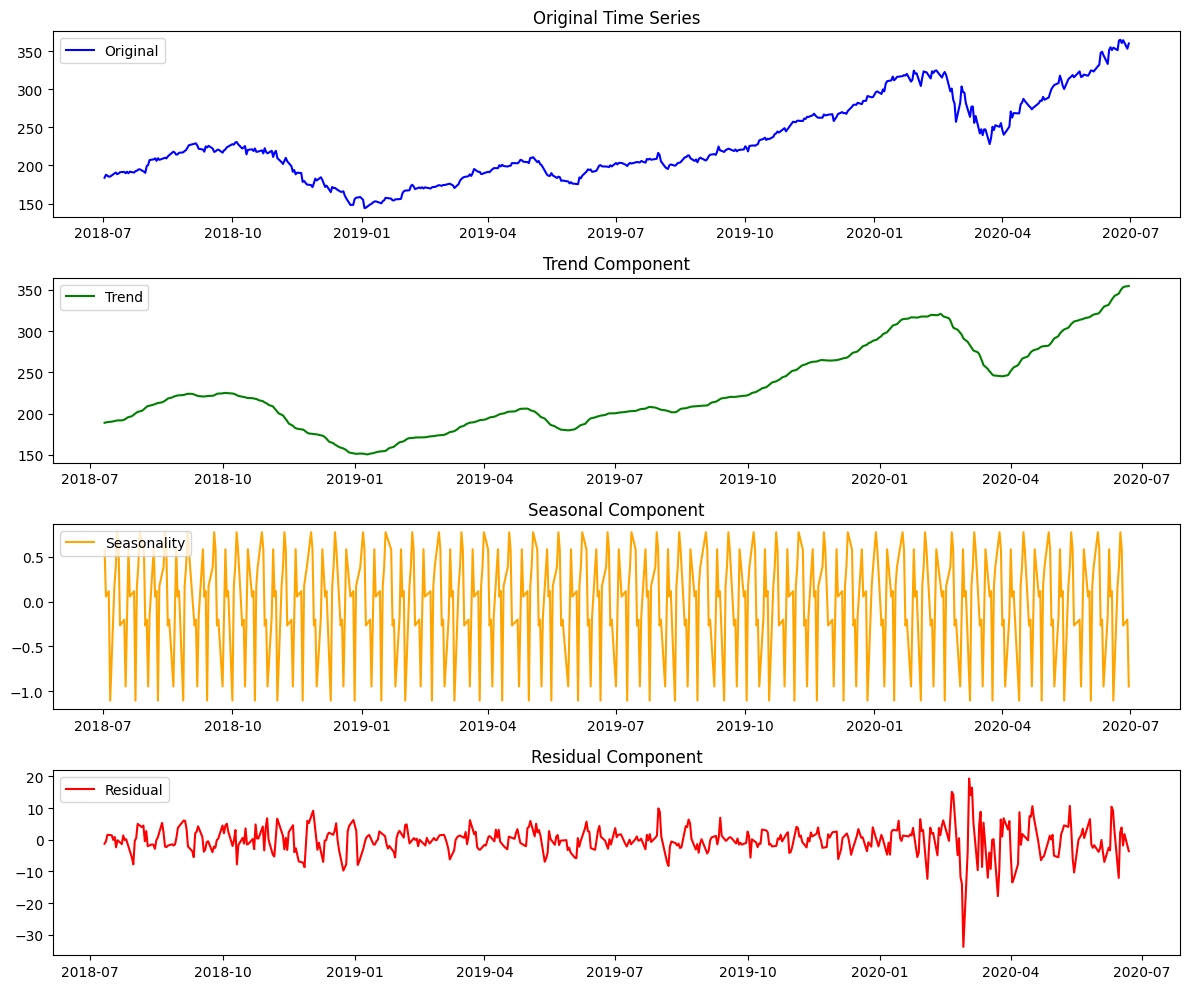

In [ ]:
decomposition = seasonal_decompose(time_series, model='additive', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(12, 10))

# Original Time Series
plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original', color='blue')
plt.title('Original Time Series')
plt.legend(loc='upper left')

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend(loc='upper left')

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

# Residual Component
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

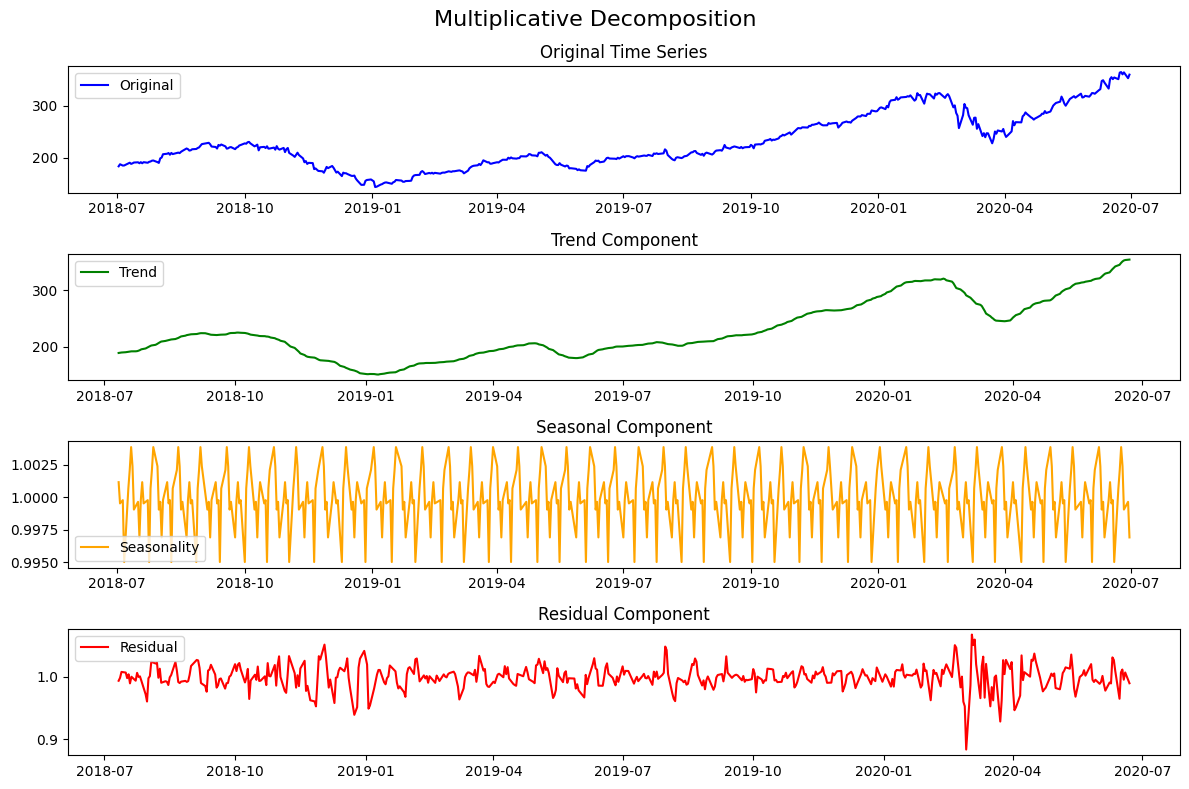

In [ ]:
multiplicative_decomposition = seasonal_decompose(time_series, model='multiplicative', period=12)


plt.figure(figsize=(12, 8))
plt.suptitle('Multiplicative Decomposition', fontsize=16)

plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original', color='blue')
plt.title('Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(multiplicative_decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(multiplicative_decomposition.seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(multiplicative_decomposition.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()


Trend Estimation : Apply Simple Moving Average (SMA) and Weighted Moving Average (WMA); experiment with parameters and plot results.

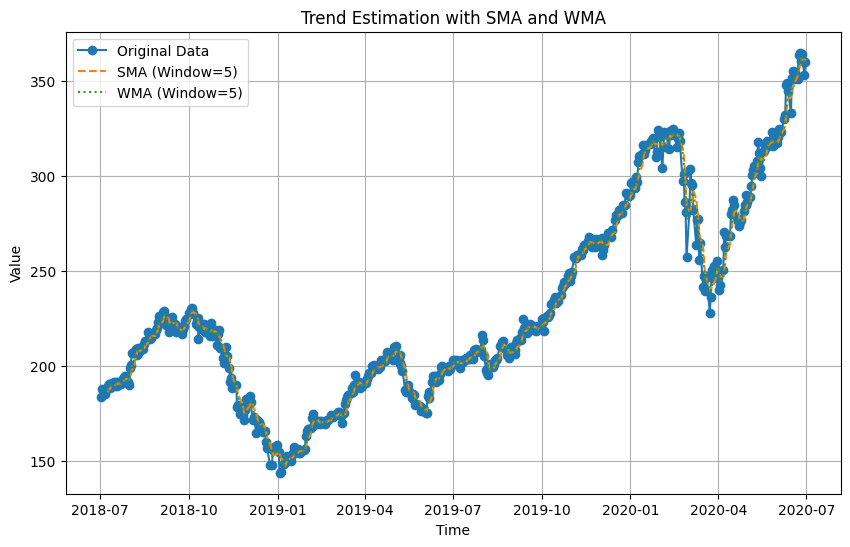

In [ ]:
# Simple Moving Average (SMA) function
def calculate_sma(data, window):
    return data.rolling(window=window).mean()

# Weighted Moving Average (WMA) function
def calculate_wma(data, window):
    weights = np.arange(1, window + 1)
    return data.rolling(window=window).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Parameters
window_size = 5

# Calculate SMA and WMA
sma = calculate_sma(time_series, window_size)
wma = calculate_wma(time_series, window_size)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(time_series, label="Original Data", marker="o")
plt.plot(sma, label=f"SMA (Window={window_size})", linestyle="--")
plt.plot(wma, label=f"WMA (Window={window_size})", linestyle=":")
plt.title("Trend Estimation with SMA and WMA")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

Exponential Smoothing : Use Single (SES), Double (Holt’s Linear Trend), and Triple (Holt-Winters) Exponential Smoothing; tune parameters and evaluate effectiveness.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
<

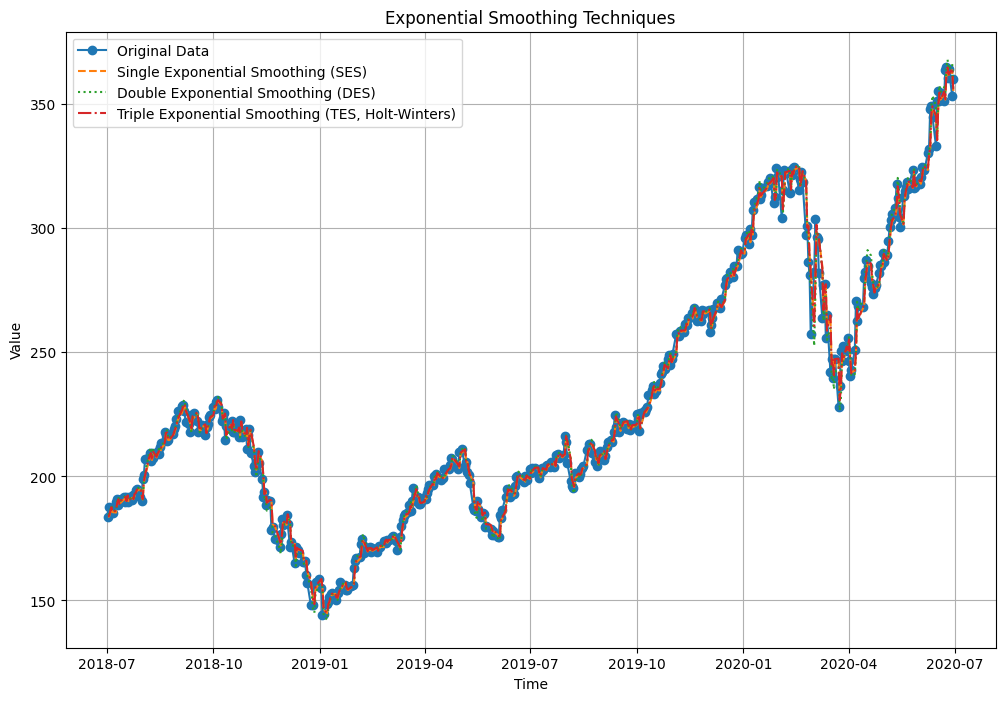

SES Forecast: 503    359.136495
504    359.136495
505    359.136495
dtype: float64
DES Forecast: 503    359.712607
504    360.231167
505    360.749727
dtype: float64
TES Forecast: 503    359.520783
504    360.307952
505    360.573646
dtype: float64


In [ ]:
# 1. Single Exponential Smoothing (SES)
def single_exponential_smoothing(data, smoothing_level=0.8):
    model = SimpleExpSmoothing(data)
    fitted_model = model.fit(smoothing_level=smoothing_level, optimized=False)
    return fitted_model.fittedvalues, fitted_model.forecast(steps=3)

# 2. Double Exponential Smoothing (DES)
def double_exponential_smoothing(data, trend="add", smoothing_level=0.8, smoothing_slope=0.2):
    model = ExponentialSmoothing(data, trend=trend, seasonal=None)
    fitted_model = model.fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, optimized=False)
    return fitted_model.fittedvalues, fitted_model.forecast(steps=3)

# 3. Triple Exponential Smoothing (Holt-Winters, TES)
def triple_exponential_smoothing(data, trend="add", seasonal="add", seasonal_periods=4):
    model = ExponentialSmoothing(data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fitted_model = model.fit(optimized=True)
    return fitted_model.fittedvalues, fitted_model.forecast(steps=3)

# Apply smoothing methods
smoothing_level = 0.8
smoothing_slope = 0.2
seasonal_periods = 4

ses_fitted, ses_forecast = single_exponential_smoothing(time_series, smoothing_level)
des_fitted, des_forecast = double_exponential_smoothing(time_series, "add", smoothing_level, smoothing_slope)
tes_fitted, tes_forecast = triple_exponential_smoothing(time_series, "add", "add", seasonal_periods=seasonal_periods)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(time_series, label="Original Data", marker="o")
plt.plot(ses_fitted, label="Single Exponential Smoothing (SES)", linestyle="--")
plt.plot(des_fitted, label="Double Exponential Smoothing (DES)", linestyle=":")
plt.plot(tes_fitted, label="Triple Exponential Smoothing (TES, Holt-Winters)", linestyle="-.")
plt.title("Exponential Smoothing Techniques")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Forecast Output
print("SES Forecast:", ses_forecast)
print("DES Forecast:", des_forecast)
print("TES Forecast:", tes_forecast)

Forecasting with AR, ARIMA, SARIMA : Fit ARIMA/SARIMA models, tune parameters (p, d, q, P, D, Q, s), forecast future values, and plot results.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


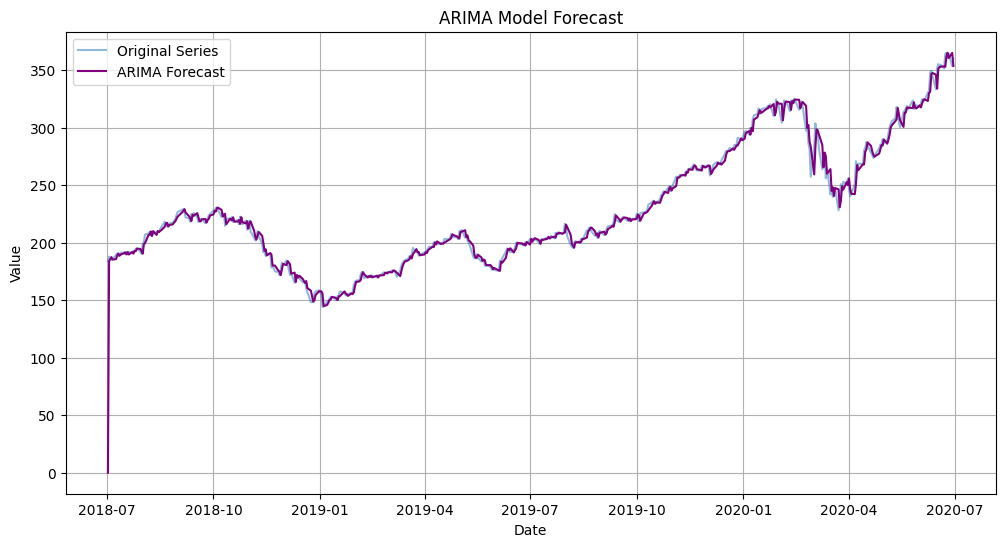

In [ ]:
arima_model = ARIMA(time_series, order=(2, 1, 2)).fit()
arima_forecast = arima_model.fittedvalues

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Series', alpha=0.5)
plt.plot(arima_forecast, label='ARIMA Forecast', color='purple')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [ ]:
mae = mean_absolute_error(time_series[1:], arima_forecast[1:])
rmse = np.sqrt(mean_squared_error(time_series[1:], arima_forecast[1:]))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 3.4054286824549127
Root Mean Squared Error (RMSE): 5.081550212780095
